**Group Members**\
        **Cherukuri Nikhilesh - S20180010040**\
        **Kore Nithish Kumar - S20180010086**\
        **Pulla Nagendra Babu - S20180010138**\
        **Rishab Tripati - S20180010147**

In [ ]:
import pandas as pd
import statistics
import numpy as np 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold ,RepeatedKFold,train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import shapiro,pearsonr
from scipy import stats
import scipy as sp
from sklearn.metrics import r2_score
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from sklearn import preprocessing,metrics,datasets, linear_model,svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import linear_model,tree

In [ ]:
all_sheets=pd.read_excel('/content/sample_data/stock portfolio performance data set.xlsx',sheet_name=['all period'],skiprows=[0], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
df=pd.concat(all_sheets[frame] for frame in all_sheets.keys())
df.keys()
df.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.149238,0.014746,1.035873,0.106317,0.677397,0.573460
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.027872,0.007101,0.112173,0.014277,0.035196,0.056496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070000,-0.005000,0.820000,0.086000,0.563000,0.450000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.138000,0.012000,0.970000,0.096500,0.663000,0.525000
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.153000,0.015000,1.010000,0.104000,0.675000,0.575000
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.170000,0.019500,1.080000,0.113000,0.700000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.195000,0.026000,1.390000,0.149000,0.750000,0.663000


In [ ]:
sheet1=pd.read_excel('/content/sample_data/stock portfolio performance data set.xlsx',sheet_name=['1st period'],skiprows=[0], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
df1=pd.concat(sheet1[frame] for frame in sheet1.keys())
df1.keys()
df1.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.234011,0.011986,1.062356,0.069159,0.791270,0.611111
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.032951,0.009527,0.155085,0.010609,0.052777,0.085875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.159525,-0.009736,0.784163,0.046071,0.650000,0.400000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.213287,0.005465,0.941333,0.061655,0.750000,0.550000
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.237748,0.013998,1.043684,0.068901,0.800000,0.600000
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.255612,0.019237,1.171757,0.077398,0.800000,0.650000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.294884,0.025906,1.416787,0.089519,0.900000,0.800000


In [ ]:
sheet2=pd.read_excel('/content/sample_data/stock portfolio performance data set.xlsx',sheet_name=['2nd period'],skiprows=[0], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
df2=pd.concat(sheet2[frame] for frame in sheet2.keys())
df2.keys()
df2.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.138643,-0.013590,0.971970,0.100923,0.641270,0.341270
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.035723,0.006253,0.161223,0.014463,0.061918,0.061263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070053,-0.032844,0.680929,0.079385,0.500000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115715,-0.016677,0.863704,0.092233,0.600000,0.300000
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.137236,-0.013273,0.962748,0.099063,0.650000,0.350000
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.164366,-0.009029,1.055780,0.106713,0.675000,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.220299,0.000151,1.438916,0.164251,0.850000,0.500000


In [ ]:
sheet3=pd.read_excel('/content/sample_data/stock portfolio performance data set.xlsx',sheet_name=['3rd period'],skiprows=[0], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
df3=pd.concat(sheet3[frame] for frame in sheet3.keys())
df3.keys()
df3.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.196076,0.051691,1.105737,0.119776,0.697619,0.788095
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.077859,0.017493,0.165374,0.018467,0.089995,0.093634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007220,0.004897,0.862257,0.087401,0.500000,0.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162347,0.042991,0.997902,0.104979,0.650000,0.750000
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.212819,0.057804,1.080583,0.119471,0.700000,0.800000
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.246778,0.064084,1.204372,0.130064,0.750000,0.850000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300086,0.076156,1.580440,0.164360,0.850000,0.900000


In [ ]:
sheet4=pd.read_excel('/content/sample_data/stock portfolio performance data set.xlsx',sheet_name=['4th period'],skiprows=[0], usecols = [1,2,3,4,5,6,7,8,9,10,11,12])
df4=pd.concat(sheet4[frame] for frame in sheet4.keys())
df4.keys()
df4.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.040384,0.010196,1.206636,0.124854,0.578571,0.552381
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.028337,0.007972,0.271843,0.031626,0.043731,0.100975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053382,-0.014856,0.800792,0.078831,0.400000,0.300000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021405,0.004378,0.997674,0.100883,0.550000,0.500000
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.042629,0.010413,1.181784,0.119563,0.550000,0.550000
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.061776,0.015840,1.363218,0.139269,0.600000,0.650000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.098369,0.026548,1.939118,0.218617,0.650000,0.750000


In [ ]:
periods = [1990,1995,2000,2005]

In [ ]:
def get_counts(target):
    aa1 = []
    aa2 = []
    aa3 = []
    aa4 = []
    avg1 = np.mean(df1[target])
    avg2 = np.mean(df2[target])
    avg3 = np.mean(df3[target])
    avg4 = np.mean(df4[target])
    for i in df1[target]:
      if i > avg1:
        aa1.append(i)
    for i in df2[target]:
      if i > avg2:
        aa2.append(i)
    for i in df3[target]:
      if i > avg3:
        aa3.append(i)
    for i in df4[target]:
      if i > avg4:
        aa4.append(i)
    stocks_more_than_average = [len(aa1),len(aa2),len(aa3),len(aa4)]
    return stocks_more_than_average

In [ ]:
def plot_pie(counts,target):
      # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    sizes = counts
    labels = '1st Period(' + str(sizes[0]) +')', '2nd Period(' + str(sizes[1]) +')', '3rd Period(' + str(sizes[2]) +')', '4th Period(' + str(sizes[3]) +')'
    # sizes = [35, 30, 37, 34]
    # explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Stocks which are more than Average of ' + target)
    plt.show()

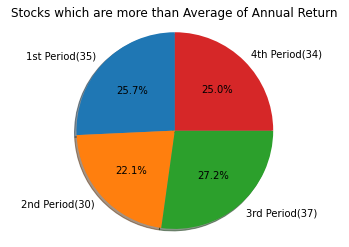

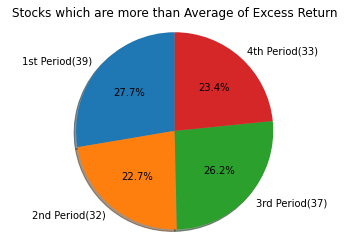

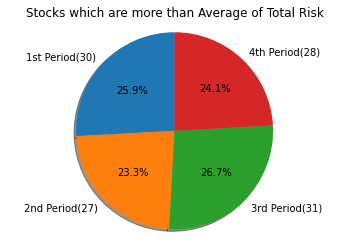

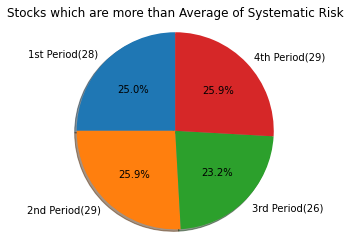

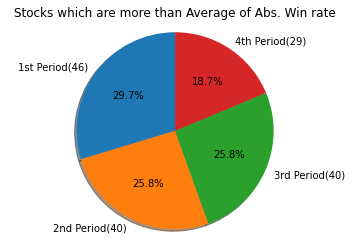

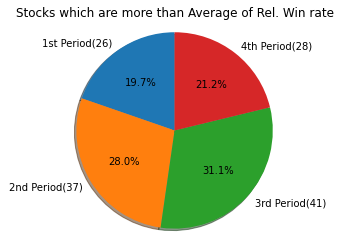

In [ ]:
plot_pie(get_counts('Annual Return'),'Annual Return')
plot_pie(get_counts('Excess Return'),'Excess Return')
plot_pie(get_counts('Total Risk'),'Total Risk')
plot_pie(get_counts('Systematic Risk'),'Systematic Risk')
plot_pie(get_counts('Abs. Win Rate'),'Abs. Win rate')
plot_pie(get_counts('Rel. Win Rate'),'Rel. Win rate')

In [ ]:
sheet1=pd.read_excel('/content/sample_data/stock portfolio performance data set.xlsx',sheet_name=['1st period'],skiprows=[0], usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
df1=pd.concat(sheet1[frame] for frame in sheet1.keys())
df1.keys()
df1.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.530170,0.565666,0.463847,0.518837,0.539048,0.516667
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.146061,0.160370,0.147088,0.146510,0.126666,0.128813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.438309,0.455895,0.349064,0.415205,0.440000,0.425000
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.546736,0.599535,0.446138,0.515278,0.560000,0.500000
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.625922,0.687719,0.567606,0.632619,0.560000,0.575000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [ ]:
sheet2=pd.read_excel('/content/sample_data/stock portfolio performance data set.xlsx',sheet_name=['2nd period'],skiprows=[0], usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
df2=pd.concat(sheet2[frame] for frame in sheet2.keys())
df2.keys()
df2.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.473909,0.550124,0.430379,0.352272,0.442177,0.482540
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.142657,0.113709,0.127619,0.102253,0.106145,0.122527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.382349,0.493989,0.344679,0.290839,0.371429,0.400000
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.468291,0.555884,0.423079,0.339123,0.457143,0.500000
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.576634,0.633056,0.496721,0.393209,0.500000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [ ]:
sheet3=pd.read_excel('/content/sample_data/stock portfolio performance data set.xlsx',sheet_name=['3rd period'],skiprows=[0], usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
df3=pd.concat(sheet3[frame] for frame in sheet3.keys())
df3.keys()
df3.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.596927,0.594001,0.403413,0.452403,0.538776,0.632143
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.152015,0.147289,0.138161,0.143974,0.154277,0.140451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.531071,0.520752,0.313323,0.337043,0.457143,0.575000
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.629617,0.645476,0.382398,0.450029,0.542857,0.650000
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.695919,0.698353,0.485817,0.532612,0.628571,0.725000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [ ]:
sheet4=pd.read_excel('/content/sample_data/stock portfolio performance data set.xlsx',sheet_name=['4th period'],skiprows=[0], usecols = [1,2,3,4,5,6,13,14,15,16,17,18])
df4=pd.concat(sheet4[frame] for frame in sheet4.keys())
df4.keys()
df4.describe()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.166619,0.166619,0.166619,0.166619,0.166619,0.166619,0.570737,0.563039,0.413916,0.397544,0.628571,0.536508
std,0.199304,0.199304,0.199304,0.199304,0.199304,0.199304,0.112040,0.115526,0.143286,0.135746,0.104956,0.134633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.495695,0.478730,0.303774,0.294651,0.560000,0.466667
50%,0.167000,0.167000,0.167000,0.167000,0.167000,0.167000,0.579611,0.566175,0.400817,0.374831,0.560000,0.533333
75%,0.291500,0.291500,0.291500,0.291500,0.291500,0.291500,0.655315,0.644828,0.496449,0.459415,0.680000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000


In [ ]:
stock1 = [df1['Annual Return.1'][0],df2['Annual Return.1'][0],df3['Annual Return.1'][0],df4['Annual Return.1'][0]]
stock2 = [df1['Annual Return.1'][1],df2['Annual Return.1'][1],df3['Annual Return.1'][1],df4['Annual Return.1'][1]]
stock3 = [df1['Annual Return.1'][2],df2['Annual Return.1'][2],df3['Annual Return.1'][2],df4['Annual Return.1'][2]]
stock4 = [df1['Annual Return.1'][3],df2['Annual Return.1'][3],df3['Annual Return.1'][3],df4['Annual Return.1'][3]]

In [ ]:
stocks = [stock1,stock2,stock3,stock4]

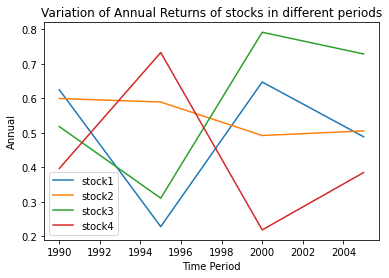

In [ ]:
i = 1
for stock in stocks:
  plt.plot(periods,stock,label = 'stock' + str(i))
  i = i + 1
plt.title('Variation of Annual Returns of stocks in different periods')
plt.xlabel('Time Period')
plt.ylabel('Annual')
plt.legend()
plt.show()

In [ ]:
stock1 = [df1['Excess Return.1'][0],df2['Excess Return.1'][0],df3['Excess Return.1'][0],df4['Excess Return.1'][0]]
stock2 = [df1['Excess Return.1'][1],df2['Excess Return.1'][1],df3['Excess Return.1'][1],df4['Excess Return.1'][1]]
stock3 = [df1['Excess Return.1'][2],df2['Excess Return.1'][2],df3['Excess Return.1'][2],df4['Excess Return.1'][2]]
stock4 = [df1['Excess Return.1'][3],df2['Excess Return.1'][3],df3['Excess Return.1'][3],df4['Excess Return.1'][3]]

In [ ]:
stocks = [stock1,stock2,stock3,stock4]

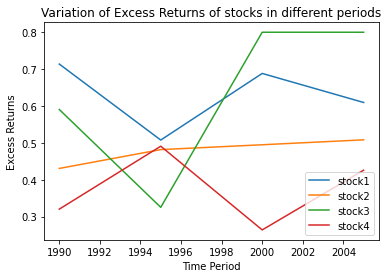

In [ ]:

i = 1
for stock in stocks:
  plt.plot(periods,stock,label = 'stock' + str(i))
  i = i + 1
plt.title('Variation of Excess Returns of stocks in different periods')
plt.xlabel('Time Period')
plt.ylabel('Excess Returns')
plt.legend()
plt.show()

In [ ]:
stock1 = [df1['Total Risk.1'][0],df2['Total Risk.1'][0],df3['Total Risk.1'][0],df4['Total Risk.1'][0]]
stock2 = [df1['Total Risk.1'][1],df2['Total Risk.1'][1],df3['Total Risk.1'][1],df4['Total Risk.1'][1]]
stock3 = [df1['Total Risk.1'][2],df2['Total Risk.1'][2],df3['Total Risk.1'][2],df4['Total Risk.1'][2]]
stock4 = [df1['Total Risk.1'][3],df2['Total Risk.1'][3],df3['Total Risk.1'][3],df4['Total Risk.1'][3]]

In [ ]:
stocks = [stock1,stock2,stock3,stock4]

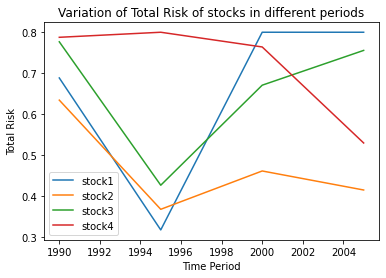

In [ ]:

i = 1
for stock in stocks:
  plt.plot(periods,stock,label = 'stock' + str(i))
  i = i + 1
plt.title('Variation of Total Risk of stocks in different periods')
plt.xlabel('Time Period')
plt.ylabel('Total Risk')
plt.legend()
plt.show()